In [1]:
import pandas as pd
import numpy as np
import re
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse

In [2]:
def clean_string(query):
    return re.sub('\s+', ' ', query.replace('(', ' ').replace(')', ' ').replace(',', ' , ')).strip()

In [14]:
df = pd.read_csv('../data/non_obf_data.csv')
df

,payload,length,label
0,c/ caridad s/n,14,0
1,"campello, el",12,0
2,40184,5,0
3,1442431887503330,16,0
4,nue37,5,0
...,...,...,...
30151,"1') and extractvalue(7982,concat(0x5c,0x717170...",111,1
30152,"1"" order by 1--",15,1
30153,"1' procedure analyse(extractvalue(5840,concat(...",149,1
30154,1 rlike (select * from (select(sleep(5)))sgvo)...,53,1


In [15]:
count_vect = CountVectorizer(analyzer='word', ngram_range=(3,3))
raw_counts = count_vect.fit_transform(df['payload'])

# Display features
features = count_vect.get_feature_names()
print('Number of features: ' + str(len(features)))

Number of features: 37275


In [16]:
# Append metadata to sparse matrix that will be used to train the classifier
num_feats = df[['length']].values
all_data = sparse.hstack((raw_counts, num_feats))
all_labels = df['label'].values

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.3, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0).fit(train_data, train_labels)
classifier_type = 'Random Forest'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
# Run inference on the test data and predict labels for each data point in the test data
predicted_labels = classifier.predict(test_data)

# Calculate and print the following metrics: precision, recall, f1-measure, and accuracy
from sklearn import metrics
precision = metrics.precision_score(test_labels, predicted_labels)
recall = metrics.recall_score(test_labels, predicted_labels)
f1measure = metrics.f1_score(test_labels, predicted_labels)
accuracy = metrics.accuracy_score(test_labels, predicted_labels)

print(' precision = ' + str(precision))
print('    recall = ' + str(recall))
print('F1-measure = ' + str(f1measure))
print('  accuracy = ' + str(accuracy))
print('\n')

 precision = 0.869615832363213
    recall = 0.9346262120738192
F1-measure = 0.9009497964721846
  accuracy = 0.9273792417375926




In [20]:
classifier.feature_importances_

array([5.65073621e-04, 0.00000000e+00, 0.00000000e+00, ...,
       2.99877584e-06, 0.00000000e+00, 3.52280136e-01])

In [21]:
np.argsort(classifier.feature_importances_)[::-1]

array([37275, 32834, 30484, ..., 22945, 22946, 18637])

In [11]:
np.sort(classifier.feature_importances_)[::-1][0:10]

array([0.35228014, 0.03234552, 0.02979093, 0.01824986, 0.0127953 ,
       0.00880442, 0.00866084, 0.00775528, 0.00729544, 0.0070376 ])

In [23]:
# features[2551635] -> length

In [24]:
np.argsort(classifier.feature_importances_)[::-1][0:10]

array([37275, 32834, 30484, 30844, 30496,   720, 15000, 23858, 30603,
       23072])

In [25]:
for i in np.argsort(classifier.feature_importances_)[::-1][0:10]:
    if(i == 37275):
        print('string length')
        continue
    print(features[i])

string length
union all select
select case when
select null null
select count from
113 select case
all select null
from select sleep
select from select
else end from


In [ ]:
np.sort(classifier.feature_importances_)[::-1][0:10]

['string length', 'union all select', 'select case when', 'select null null', 'select count from', '113 select case', 'all select null', 'from select sleep', 'select from select', 'else end from']


TypeError: object of type 'int' has no len()

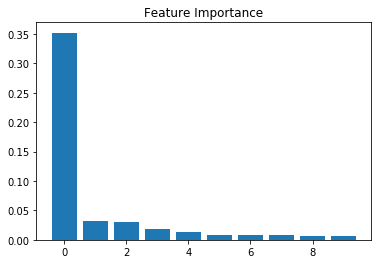

In [29]:
import matplotlib.pyplot as plt
indices = np.argsort(classifier.feature_importances_)[::-1][0:10]
features.append('string length')
names = [features[i] for i in indices]
print(names)
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(10), classifier.feature_importances_[indices])
# Add feature names as x-axis labels
plt.xticks(10, names, rotation=90)

# Show plot
plt.show()